## Observations and Insights 

* Overall, Capomulin proved to be a viable drug regimen to reduce tumor growth.
* The Capomulin and Ramicane regimens had the largest sample sizes. 
* There is a strong positive correlation between average mouse weight and tumor volume, indicating that lower mouse weight may contribute to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#drop any results with NA
mouse_study_merge = mouse_study_merge.dropna()
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Display the total mouse count.
total_mousecount = len(mouse_study_merge["Mouse ID"])
unique_mousecount = mouse_study_merge["Mouse ID"].nunique()
print (f"This dataset includes \033[1m{unique_mousecount}\033[0m mice and \033[1m{total_mousecount}\033[0m rows of data.")

This dataset includes 249 mice and 1893 rows of data.


In [6]:
# Show the Mouse ID number for duplicate records (based on Mouse ID and Timepoint). 
duplicate_mouseID_timepoint = mouse_study_merge["Mouse ID"][mouse_study_merge.duplicated(["Mouse ID","Timepoint"])].reset_index()
duplicate_mouseID_timepoint

,index,Mouse ID
0,909,g989
1,911,g989
2,913,g989
3,915,g989
4,917,g989


In [7]:
#Show the full row of data for each duplicate record. 

duplicate_mouseID_timepoint = mouse_study_merge[mouse_study_merge.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouseID_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping each duplicate mouse record from the dataset by its ID.
cleaned_mouse_study = mouse_study_merge.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = "first")
cleaned_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Display the new total mouse count.
new_total_mousecount = len(cleaned_mouse_study["Mouse ID"])
new_unique_mousecount = cleaned_mouse_study["Mouse ID"].nunique()
duplicates = total_mousecount - new_total_mousecount
print (f"This clean dataset now includes \033[1m{new_unique_mousecount}\033[0m mice and \033[1m{new_total_mousecount}\033[0m rows of data. User removed \033[1m{duplicates}\033[0m duplicates.")

This clean dataset now includes 249 mice and 1888 rows of data. User removed 5 duplicates.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

##Group dataset By Drug Regimen
regimen_summary = cleaned_mouse_study.groupby(["Drug Regimen"])

##Calculate summary statistics
regimen_summary_mean = round(regimen_summary["Tumor Volume (mm3)"].mean(),2)
regimen_summary_median = round(regimen_summary["Tumor Volume (mm3)"].median(),2)
regimen_summary_variance = round(regimen_summary["Tumor Volume (mm3)"].var(),2)
regimen_summary_stddev = round(regimen_summary["Tumor Volume (mm3)"].std(),2)
regimen_summary_sem = round(regimen_summary["Tumor Volume (mm3)"].sem(),2)

#Combine statistics into summary dataframe and display summary.
regimen_summary_table = pd.DataFrame({"Mean":regimen_summary_mean,"Median":regimen_summary_median,"Variance":regimen_summary_variance,"Std Deviation":regimen_summary_stddev,"SEM":regimen_summary_sem})
regimen_summary_table

#Credit: terrylashley/Drug_Study_Analysis on GitHub https://github.com/terrylashley/Drug_Study_Analysis/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

regimen_summary_oneline = round(cleaned_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem]),2)
regimen_summary_oneline

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

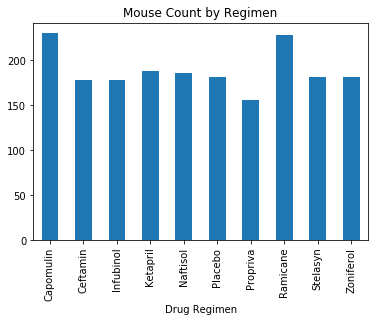

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

micecount = cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()

micecount.plot(kind='bar', x = "Regimen", y = "Count", title="Mouse Count by Regimen")
plt.savefig('1 - mouse count by regimen_pandas.png')


In [13]:
## Create count of mice in each drug regimens cohort
mouse_count_byregimen = (cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_count_byregimen

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
## Create list of drug regimens
regimen = (cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()).index.tolist()
regimen

#Credit: mpetrozzi78/The-power-of-plots on Github at https://github.com/mpetrozzi78/The-power-of-plots/blob/master/ThePowerOfPlots.ipynb

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

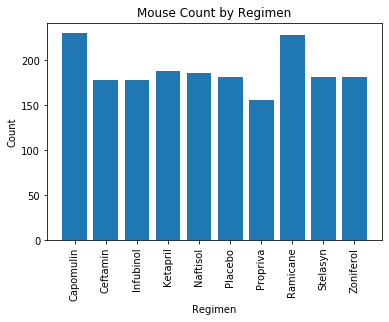

<Figure size 432x288 with 0 Axes>

In [15]:
##Build par chart with pyplot
plt.bar(regimen,mouse_count_byregimen)
plt.xlabel("Regimen")
plt.ylabel("Count")
plt.title("Mouse Count by Regimen")
plt.xticks(rotation=90)
plt.show()

#Save graph as image
plt.savefig('2 - mouse count by regimen_pyplot.png')

In [16]:
#Create a new dataframe for distribution of female versus male mice using pandas
micesex_df = pd.DataFrame(cleaned_mouse_study.groupby(["Sex"])["Mouse ID"].count()).reset_index()

#Rename Mouse ID column to Count
micesex_df = micesex_df.rename(columns={"Mouse ID": "Count"})
micesex_df


,Sex,Count
0,Female,930
1,Male,958


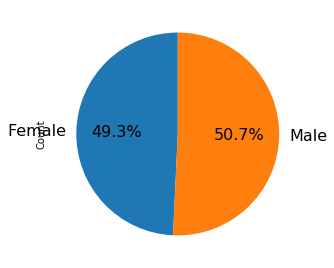

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
micesex_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=micesex_df['Sex'], legend = False, fontsize=16)

#Save graph as image
plt.savefig('3 - sex_pandas.png')

#Credit: mpetrozzi78/The-power-of-plots on Github at https://github.com/mpetrozzi78/The-power-of-plots/blob/master/ThePowerOfPlots.ipynb

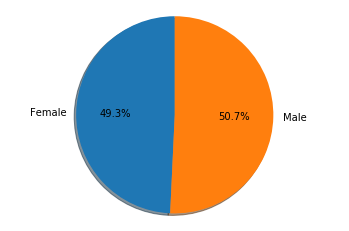

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
## Add Labels for each Sex
labels = "Female", "Male"


# Pull the count values
sizes = micesex_df["Count"]

# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#Save graph as image
plt.savefig('4 - sex_pyplot.png')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Sort data by Drug Regime, Mouse ID and Timepoint
tumor_volume = cleaned_mouse_study.sort_values(by=["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = tumor_volume.loc[tumor_volume["Timepoint"] == 45].reset_index()
max_time_df

#Drop any out of scope treatment regimens from data frame
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
filter_list = ["Ketapril","Naftisol","Placebo","Propriva","Stelasyn","Zoniferol"]

max_time_filtered_df = max_time_df[-max_time_df['Drug Regimen'].isin(filter_list)]
max_time_filtered_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
100,420,q597,Ramicane,Male,20,25,45,45.220869,2
101,234,r811,Ramicane,Male,9,19,45,37.225650,1
102,59,s508,Ramicane,Male,1,17,45,30.276232,0
103,410,u196,Ramicane,Male,18,25,45,40.667713,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
filtered_regimen = (max_time_filtered_df.groupby(["Drug Regimen"])["Mouse ID"].count()).index.tolist()
filtered_regimen

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in filtered_regimen:
    mouse_drug_regimen = max_time_filtered_df["Tumor Volume (mm3)"].loc[max_time_filtered_df["Drug Regimen"]== drug]

# # add subset 
    tumor_vol_data.append(mouse_drug_regimen)
    
# Determine outliers using upper and lower bounds
    quartiles = mouse_drug_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'For \033[1m{drug}\033[0m, Interquartile Range (IQR) is \033[1m{iqr}\033[0m')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For \033[1m{drug}\033[0m, values below \033[1m{lower_bound}\033[0m could be outliers')
    print(f'For \033[1m{drug}\033[0m, values above \033[1m{upper_bound}\033[0m could be outliers\n')
    
#Credit: EJBaquet/matplotlib-challenge on Github at https://gt.bootcampcontent.com/ejbaquet/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_starter_new.ipynb

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ceftamin, Interquartile Range (IQR) is 6.093590140000003
For Ceftamin, values below 52.29350701999999 could be outliers
For Ceftamin, values above 76.66786758 could be outliers

For Infubinol, Interquartile Range (IQR) is 4.9311172099999965
For Infubinol, values below 55.35777559500001 could be outliers
For Infubinol, values above 75.08224443499999 could be outliers

For Ramicane, Interquartile Range (IQR) is 7.527130082499998
For Ramicane, values below 19.690480101250003 could be outliers
For Ramicane, values above 49.79900043124999 could be outliers



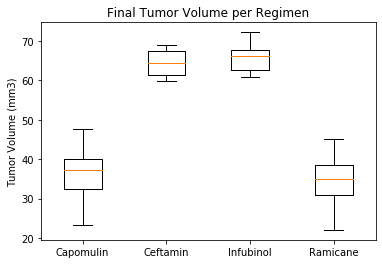

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# format the outliers differently
green_diamond = dict(markerfacecolor='g', marker='D')

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(filtered_regimen)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol_data, flierprops=green_diamond)
plt.show()

# fig = plt.figure(1, figsize=(9, 6))
# ax = fig.add_subplot(111)
# ax.set_xticklabels(filtered_regimen)
# ax.set_ylabel('Tumor Volume (mm3)')
# tumor_volume_bp = ax.boxplot(tumor_vol_data)
# ax.boxplot(tumor_vol_data, flierprops=green_diamond)

#Save graph as image
plt.savefig('5 - tumor volume by regimen_boxplot.png')

## Line and Scatter Plots

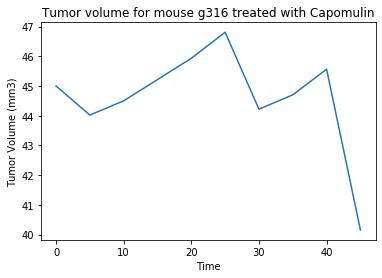

In [222]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Filter data for mouse g316 treated with Capomulin
tumor_vol_single_mouse = cleaned_mouse_study[["Timepoint","Tumor Volume (mm3)"]].loc[(cleaned_mouse_study["Drug Regimen"] == "Capomulin") & (cleaned_mouse_study["Mouse ID"] == "g316")]
tumor_vol_single_mouse

#Create line plot
plt.plot (tumor_vol_single_mouse["Timepoint"],tumor_vol_single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume for mouse g316 treated with Capomulin")
plt.savefig("6 - g316_tumor_vol_Capomulin.png")
plt.show()

In [223]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

##Create a dataframe of Capomulin results grouped by Timepoint, showing average Weight and Tumor Volume
capomulin_df = cleaned_mouse_study.loc[(cleaned_mouse_study["Drug Regimen"] == "Capomulin")].reset_index()
capomulin_timepoint_df = capomulin_df.groupby(["Timepoint"]).agg({'Weight (g)':['mean'],'Tumor Volume (mm3)':['mean']})
capomulin_timepoint_df

,Weight (g),Tumor Volume (mm3)
,mean,mean
Timepoint,,
0,20.120000,45.000000
5,20.120000,44.266086
10,20.120000,43.084291
15,20.000000,42.064317
20,19.782609,40.716325
25,19.909091,39.939528
30,19.909091,38.769339
35,19.909091,37.816839


Text(0.5, 0, 'Weight (g)')

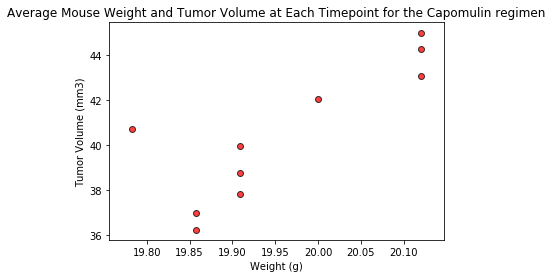

In [224]:
# Generate a scatter plot
plt.scatter(capomulin_timepoint_df["Weight (g)"], capomulin_timepoint_df["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title ("Average Mouse Weight and Tumor Volume at Each Timepoint for the Capomulin regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation between both factors is 0.82
The linear regression equation is y = 20.29x + -364.52


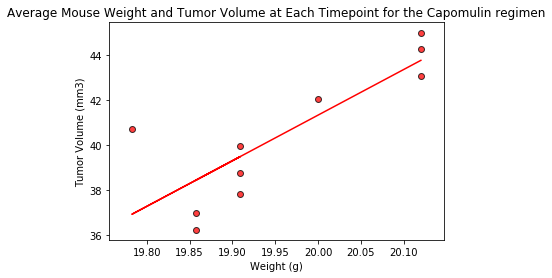

In [225]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
avg_weight = capomulin_timepoint_df["Weight (g)"]
avg_tumor = capomulin_timepoint_df["Tumor Volume (mm3)"]

#Unstack groupby dataframe
avg_weight = avg_weight.unstack()
avg_tumor = avg_tumor.unstack()

correlation = st.pearsonr(avg_weight_list, avg_tumor_list)
print(f"The correlation between both factors is \033[1m{round(correlation[0],2)}\033[0m")

# Calculate the linear regression model and reprduce scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_timepoint_df["Weight (g)"], capomulin_timepoint_df["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(avg_weight,regress_values,"r-")
print(f"The linear regression equation is \033[1m{line_eq}\033[0m")

plt.title ("Average Mouse Weight and Tumor Volume at Each Timepoint for the Capomulin regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.savefig("7 - avg_weight_tumor_volume.png")
plt.show()
                                                                                       